# Angle plot of the thingies idk🌝

In [2]:
from matplotlib import pyplot as plt
import numpy as np

Text(0, 0.5, '$v_{rot}$ in $kms^{-1}$')

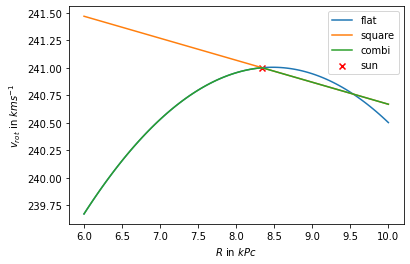

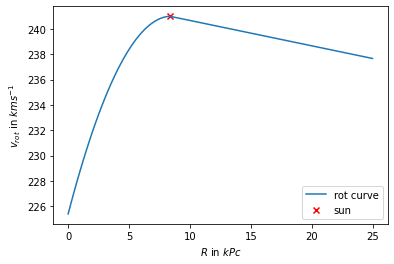

In [3]:
#Polynoom rotatiekromme, drie variabelen
A1 = 241.0; # +/- 9 kms
A2 = 0.5; # +/- 3.7
A3 = -15.1; # +/- 8.4

#Orbitale snelheid vd zon en afstand zon-sagA*
R0 = 8.34
T0 = A1

#domme helpfuncties
def r_to_rho(r): return (r / R0) - 1.0
def rho_to_r(rho): return R0 * (rho + 1.0)

#vlakke draaiingskromme
def rot_curve_flat(r):
    return T0 - 0.2*(r - R0)

#kwadratische draaiingskromme
def rot_curve_sq(r):
    rho = r_to_rho(r)
    return A1 + A2*rho + A3*(rho**2)

#combinatie
def rot_curve(r):
    sq = np.where(r < R0)
    v = rot_curve_flat(r)
    v[sq] = rot_curve_sq(r[sq])
    return v

#plot van de twee
x = np.linspace(6, 10, 100)
v_max = np.max(rot_curve_sq(x))
x_max = np.where(rot_curve_sq(x) == v_max)

plt.plot(x, rot_curve_sq(x), label="flat")
plt.plot(x, rot_curve_flat(x), label="square")
plt.plot(x, rot_curve(x), label="combi")
plt.scatter(R0, T0, marker="x", label="sun", color='red')
plt.legend()
plt.xlabel("$R$ in $kPc$")
plt.ylabel("$v_{rot}$ in $kms^{-1}$")

#plot van de twee
x = np.linspace(0, 25, 100)
v_max = np.max(rot_curve_sq(x))
x_max = np.where(rot_curve_sq(x) == v_max)

plt.figure()
plt.plot(x, rot_curve(x), label="rot curve")
plt.scatter(R0, T0, marker="x", label="sun", color='red')
plt.legend()
plt.xlabel("$R$ in $kPc$")
plt.ylabel("$v_{rot}$ in $kms^{-1}$")

Text(0.5, 0, '$v_{rot}$ in $kms^{-1}$')

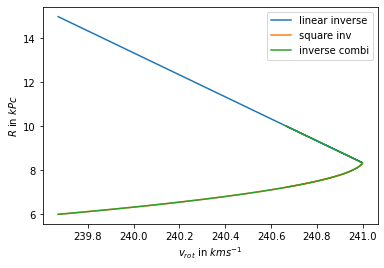

In [4]:
#voor de inverse is het waarschĳnlĳk het verstandigst om de boel op te splitsen
# in een deel voor en nà het maximum
def sqr_inv(v):
    #altijd de kleinste snelheid, dus min D
    D = np.sqrt(A2**2 - 4*A3*(A1 - v))
    rho = (-A2 + D) / (2*A3)
    return rho_to_r(rho)

def lin_inv(v):
    return -((v - T0) / 0.2) + R0

def inv_rot_curve(v):
    #maximum splitst delen
    vmax = np.min(abs(v - T0))
    vmax_idx = int(np.where(abs(v - T0) == vmax)[0])
    
    #baseline, corrigeer dan de delen die square zijn
    r = lin_inv(v)
    r[:vmax_idx] = sqr_inv(v[:vmax_idx])
    return r

#testje
x = np.linspace(6, 10, 100)
v = rot_curve(x)

plt.plot(v, lin_inv(v), label="linear inverse")
plt.plot(v, sqr_inv(v), label="square inv")
plt.plot(v, inv_rot_curve(v), label="inverse combi")
plt.legend()
plt.ylabel("$R$ in $kPc$")
plt.xlabel("$v_{rot}$ in $kms^{-1}$")

v_145=-60.000000000000014 (zou -60 moeten zĳn)
v_step=-0.827502287822881 (zou 0.82446 moeten zĳn


Text(0.5, 0, '$v_{rot}$ in $kms^{-1}$')

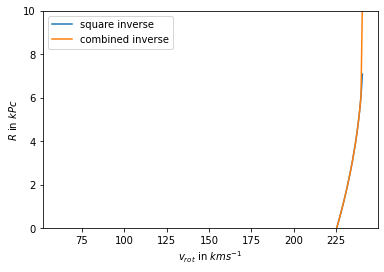

In [11]:
#snelheden van de channels
V_MIN = -150
V_MAX = 50

N_CHANNELS = 272
V_STEP = 0.82446
V_REF = -60

#snelheid is TOV zon
v = np.linspace(0, V_STEP*N_CHANNELS, num=N_CHANNELS)
v = v - (v[145] - V_REF)
print(f"v_145={v[145]} (zou -60 moeten zĳn)")
print(f"v_step={v[0]-v[1]} (zou 0.82446 moeten zĳn")

#voeg relatieve snelheid weer toe
v = v[np.where(v < 0)] + T0

plt.plot(v, sqr_inv(v), label="square inverse")
plt.ylim(0, 10)
#plt.plot(v, lin_inv(v), label="linear inverse")
plt.plot(v, inv_rot_curve(v), label="combined inverse")
plt.legend()
plt.ylabel("$R$ in $kPc$")
plt.xlabel("$v_{rot}$ in $kms^{-1}$")

In [5]:
# hoek waarlangs we kĳken is 
l = 80.75 * np.pi / 180

#ok linaire inverse, we gebruiken channels 140-150
print(v[140:150])
R = lin_inv(v[140:150])

#afstand tot aarde
R0 = R0
d = R0 * np.cos(l) + np.sqrt(R**2 + R0**2 * (np.cos(l)**2 - 1))
print(f"d={d}")
theta = np.arcsin(d/R * np.sin(l))
print(f"theta={theta}")

[176.86248856 177.68999085 178.51749314 179.34499542 180.17249771
 181.         181.82750229 182.65500458 183.48250686 184.31000915]
d=[330.26516639 326.12634303 321.98748579 317.84859337 313.70966436
 309.57069729 305.43169059 301.29264264 297.1535517  293.01441593]
theta=[1.43437379 1.4346925  1.43501943 1.43535491 1.43569927 1.43605288
 1.43641612 1.43678937 1.43717307 1.43756765]


Text(0.5, 1.0, 'galactocentric coördinates')

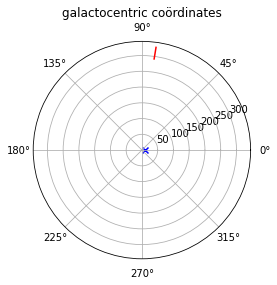

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta,R, color='red')
ax.scatter(0, R0, marker='x', color='blue')
#ax.set_ylim((4, 20))
ax.set_title("galactocentric coördinates")